<a href="https://colab.research.google.com/github/liliililliiil/my-projects/blob/main/vgames_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🎮지역에 따른 선호하는 게임 장르가 다를까??

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from google.colab import files
# myfile = files.upload()
# import io
# df = pd.read_csv(io.BytesIO(myfile['vgames2.csv']))
# df

df = pd.read_csv('vgames2.csv')
df = df.drop(columns = ['Unnamed: 0'])
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [3]:
df.info()  # check the dataframe info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [4]:
df.dropna(0, inplace = True)   # 결측치 제거
df

C:\Users\nsa28\AppData\Local\Temp\ipykernel_18868\2375865790.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0, inplace = True)   # 결측치 제거


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [5]:
def year(y):
    if 0 <= y < 20:
        return int(y + 2000)
    elif 20 < y < 100:
        return int(y + 1900)
    else:
        return int(y)
    
df['Year'] = df['Year'].apply(year)
df
# df의 연도가 네자리 숫자가 아닌 한자리나 두자리 숫자를 네자리 숫자로 바꿔주는 작업

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
def MK_change(n):
    change_list = ['K', 'M']
    if change_list[0] in n:
        return float(n.split(change_list[0])[0]) * 1000
    elif change_list[1] in n:
        return float(n.split(change_list[1])[0]) * 1000000
    else:
        return float(n) * 1000000
# _Sales 컬럼의 기본단위를 M 단위로 변경   
df['NA_Sales'] = df['NA_Sales'].apply(MK_change)
df['EU_Sales'] = df['EU_Sales'].apply(MK_change)
df['JP_Sales'] = df['JP_Sales'].apply(MK_change)
df['Other_Sales'] = df['Other_Sales'].apply(MK_change)
df

# df의 각 Sales 컬럼의 값을 M(1,000,000) 단위로 변경 해주고 데이터 자료형을 float으로 변경.

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [7]:
df.info()  # 잘 바뀌었는지 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16241 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  int64  
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.2+ MB


- 지역에 따른 선호 장르 = 지역에 따른 매출량

In [8]:
df['All_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
# NA_Sales, EU_Sales, JP_Sales, Other_Sales 컬럼의 합을 All_Sales 컬럼에 저장

In [9]:
df_genre_all = df.groupby('Genre')['All_Sales'].sum().reset_index()
df_genre_all  # All_Sales 장르별 합계

,Genre,All_Sales
0,Action,1.712980e+09
1,Adventure,2.340200e+08
2,Fighting,4.435400e+08
3,Misc,7.797000e+08
4,Platform,8.279900e+08
5,Puzzle,2.407300e+08
6,Racing,7.225500e+08
7,Role-Playing,9.015100e+08
8,Shooter,1.024750e+09
9,Simulation,3.892800e+08


In [10]:
df_genre_na = df.groupby('Genre')['NA_Sales'].sum().reset_index()
df_genre_na  # NA_Sales 장르별 합계

,Genre,NA_Sales
0,Action,858750000.0
1,Adventure,101790000.0
2,Fighting,220350000.0
3,Misc,394730000.0
4,Platform,445380000.0
5,Puzzle,121580000.0
6,Racing,354700000.0
7,Role-Playing,318760000.0
8,Shooter,574480000.0
9,Simulation,181430000.0


In [11]:
df_genre_eu = df.groupby('Genre')['EU_Sales'].sum().reset_index()
df_genre_eu  # EU_Sales 장르별 합계

,Genre,EU_Sales
0,Action,513640000.0
1,Adventure,63660000.0
2,Fighting,99900000.0
3,Misc,208150000.0
4,Platform,200630000.0
5,Puzzle,50470000.0
6,Racing,235020000.0
7,Role-Playing,183090000.0
8,Shooter,310230000.0
9,Simulation,112990000.0


In [12]:
df_genre_jp = df.groupby('Genre')['JP_Sales'].sum().reset_index()
df_genre_jp  # JP_Sales 장르별 합계

,Genre,JP_Sales
0,Action,156600000.0
1,Adventure,51870000.0
2,Fighting,87140000.0
3,Misc,104180000.0
4,Platform,130530000.0
5,Puzzle,56240000.0
6,Racing,56320000.0
7,Role-Playing,342930000.0
8,Shooter,38180000.0
9,Simulation,63540000.0


In [13]:
df_genre_ot = df.groupby('Genre')['Other_Sales'].sum().reset_index()
df_genre_ot  # Other_Sales 장르별 합계

,Genre,Other_Sales
0,Action,183990000.0
1,Adventure,16700000.0
2,Fighting,36150000.0
3,Misc,72640000.0
4,Platform,51450000.0
5,Puzzle,12440000.0
6,Racing,76510000.0
7,Role-Playing,56730000.0
8,Shooter,101860000.0
9,Simulation,31320000.0


In [14]:
pd.concat([df_genre_all, df_genre_na, df_genre_eu, df_genre_jp, df_genre_ot], axis = 1)
# NA_Sales, EU_Sales, JP_Sales, Other_Sales 장르별 합계를 합치는 작업

,Genre,All_Sales,Genre,NA_Sales,Genre,EU_Sales,Genre,JP_Sales,Genre,Other_Sales
0,Action,1.712980e+09,Action,858750000.0,Action,513640000.0,Action,156600000.0,Action,183990000.0
1,Adventure,2.340200e+08,Adventure,101790000.0,Adventure,63660000.0,Adventure,51870000.0,Adventure,16700000.0
2,Fighting,4.435400e+08,Fighting,220350000.0,Fighting,99900000.0,Fighting,87140000.0,Fighting,36150000.0
3,Misc,7.797000e+08,Misc,394730000.0,Misc,208150000.0,Misc,104180000.0,Misc,72640000.0
4,Platform,8.279900e+08,Platform,445380000.0,Platform,200630000.0,Platform,130530000.0,Platform,51450000.0
5,Puzzle,2.407300e+08,Puzzle,121580000.0,Puzzle,50470000.0,Puzzle,56240000.0,Puzzle,12440000.0
6,Racing,7.225500e+08,Racing,354700000.0,Racing,235020000.0,Racing,56320000.0,Racing,76510000.0
7,Role-Playing,9.015100e+08,Role-Playing,318760000.0,Role-Playing,183090000.0,Role-Playing,342930000.0,Role-Playing,56730000.0
8,Shooter,1.024750e+09,Shooter,574480000.0,Shooter,310230000.0,Shooter,38180000.0,Shooter,101860000.0
9,Simulation,3.892800e+08,Simulation,181430000.0,Simulation,112990000.0,Simulation,63540000.0,Simulation,31320000.0


In [15]:
df_genre = pd.merge(df_genre_all, df_genre_na, on = 'Genre')
df_genre = pd.merge(df_genre, df_genre_eu, on = 'Genre')
df_genre = pd.merge(df_genre, df_genre_jp, on = 'Genre')
df_genre = pd.merge(df_genre, df_genre_ot, on = 'Genre')
df_genre = df_genre.set_index('Genre')    # set_index('Genre')
df_genre

# NA_Sales, EU_Sales, JP_Sales, Other_Sales 장르별 합계를 합치는 작업 (공통 부분 merge)

,All_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,,
Action,1.712980e+09,858750000.0,513640000.0,156600000.0,183990000.0
Adventure,2.340200e+08,101790000.0,63660000.0,51870000.0,16700000.0
Fighting,4.435400e+08,220350000.0,99900000.0,87140000.0,36150000.0
Misc,7.797000e+08,394730000.0,208150000.0,104180000.0,72640000.0
Platform,8.279900e+08,445380000.0,200630000.0,130530000.0,51450000.0
Puzzle,2.407300e+08,121580000.0,50470000.0,56240000.0,12440000.0
Racing,7.225500e+08,354700000.0,235020000.0,56320000.0,76510000.0
Role-Playing,9.015100e+08,318760000.0,183090000.0,342930000.0,56730000.0
Shooter,1.024750e+09,574480000.0,310230000.0,38180000.0,101860000.0


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

<AxesSubplot: title={'center': 'Sales in Genre'}, xlabel='Genre', ylabel='Sales'>

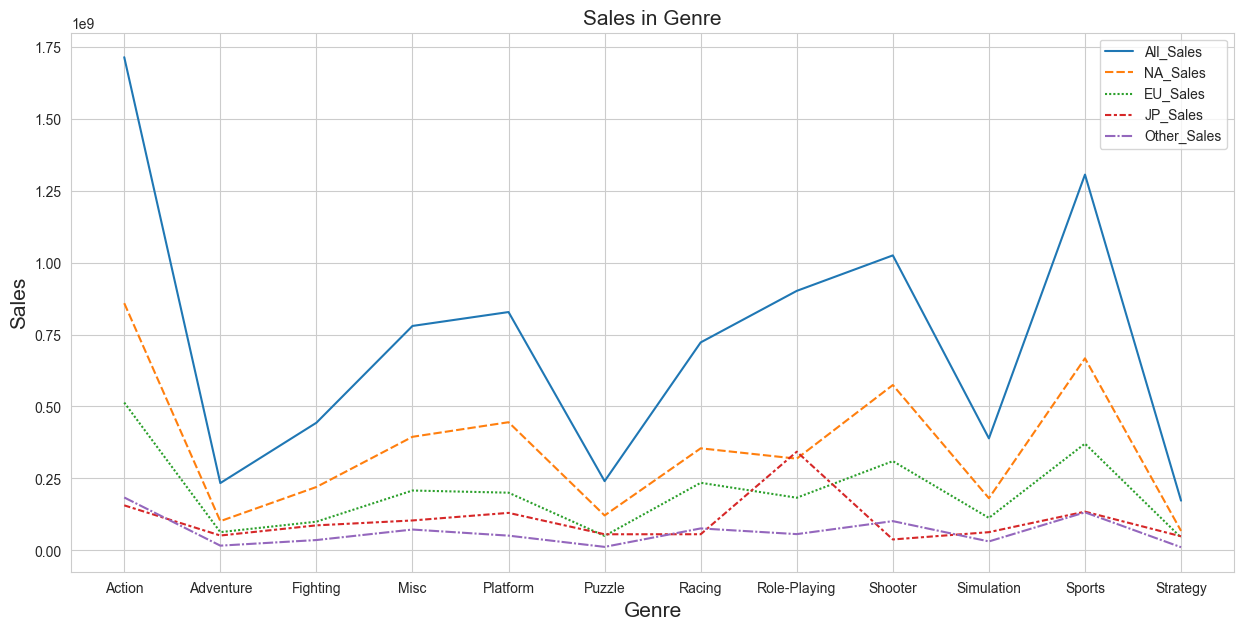

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize=(15, 7))
plt.title("Sales in Genre", fontsize = 15)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)

sns.lineplot(data = df_genre)

### - All_Sales = 1위 Action , 2위 Sports , 3위 Shooter
### - NA_Sales = 1위 Action , 2위 Sports , 3위 Shooter
### - EU_Sales = 1위 Action , 2위 Sports , 3위 Shooter
### - JP_Sales = 1위 Role_Playing , 2위 Action , 3위 Sports
### - Other_Sales = 1위 Action , 2위 Sports , 3위 Shooter

In [25]:
df_genre['All_Sales'].sort_values(ascending = False).head(3)

Genre
Action     1.712980e+09
Sports     1.305340e+09
Shooter    1.024750e+09
Name: All_Sales, dtype: float64

In [32]:
df_genre_all = df_genre['All_Sales'].sort_values(ascending = False)
df_genre_na = df_genre['NA_Sales'].sort_values(ascending = False)
df_genre_eu = df_genre['EU_Sales'].sort_values(ascending = False)
df_genre_jp = df_genre['JP_Sales'].sort_values(ascending = False)
df_genre_ot = df_genre['Other_Sales'].sort_values(ascending = False)

In [33]:
df_genre_eu

Genre
Action          513640000.0
Sports          370970000.0
Shooter         310230000.0
Racing          235020000.0
Misc            208150000.0
Platform        200630000.0
Role-Playing    183090000.0
Simulation      112990000.0
Fighting         99900000.0
Adventure        63660000.0
Puzzle           50470000.0
Strategy         44820000.0
Name: EU_Sales, dtype: float64

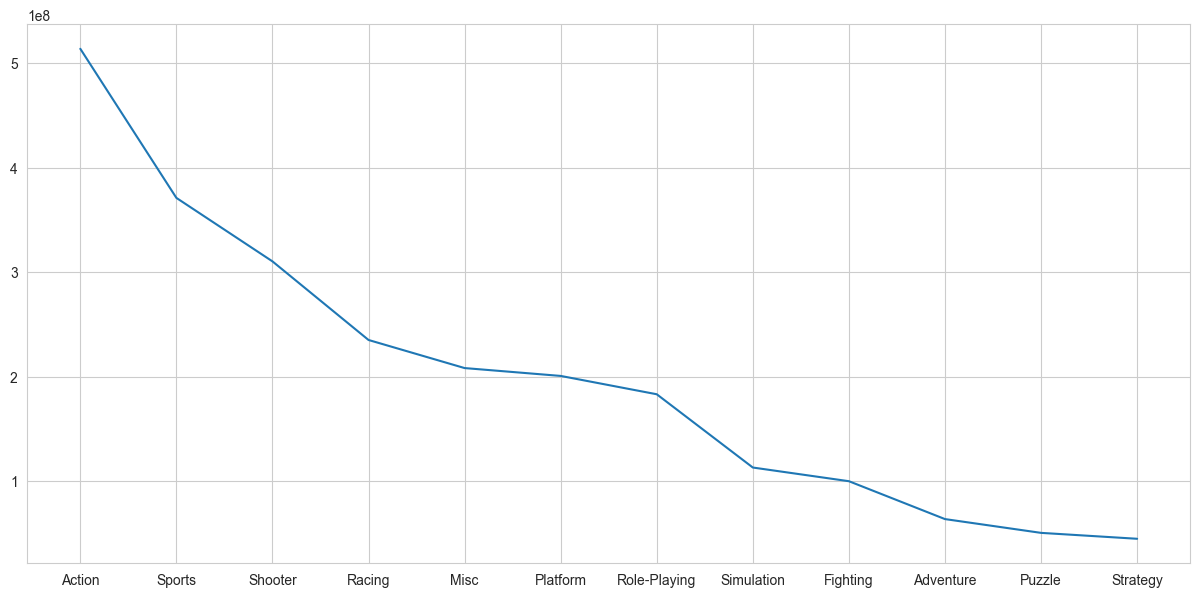

In [49]:
plt.figure(figsize = (15, 7))
plt.plot(df_genre_eu)
plt.show()

In [34]:
df_genre_all

Genre
Action          1.712980e+09
Sports          1.305340e+09
Shooter         1.024750e+09
Role-Playing    9.015100e+08
Platform        8.279900e+08
Misc            7.797000e+08
Racing          7.225500e+08
Fighting        4.435400e+08
Simulation      3.892800e+08
Puzzle          2.407300e+08
Adventure       2.340200e+08
Strategy        1.729800e+08
Name: All_Sales, dtype: float64

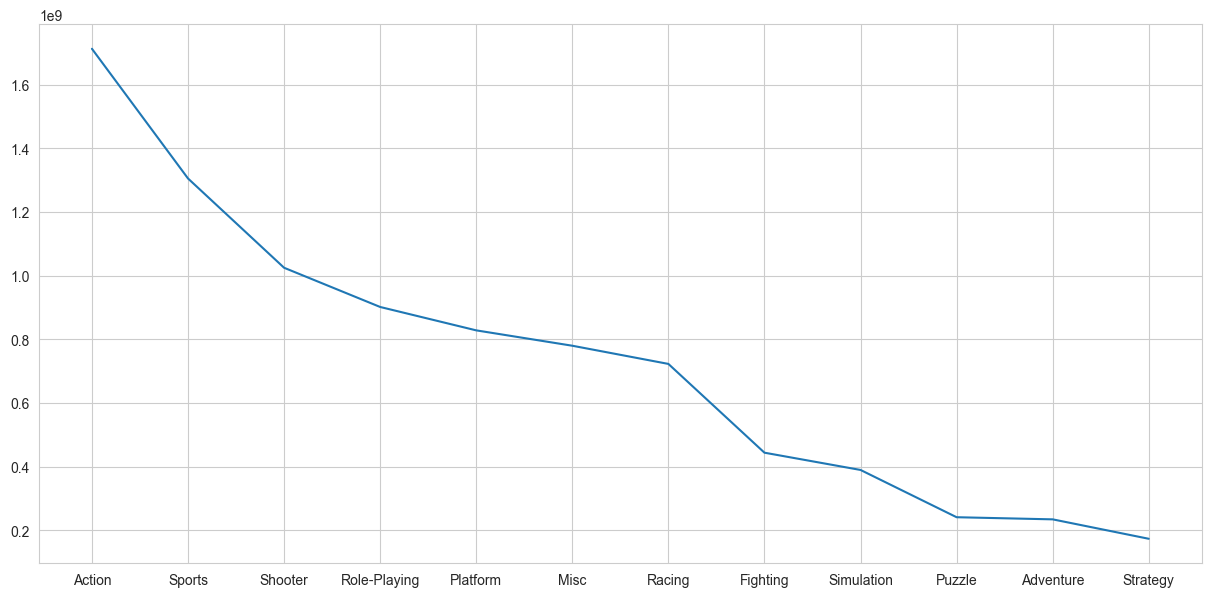

In [50]:
plt.figure(figsize = (15, 7))
plt.plot(df_genre_all)
plt.show()

In [35]:
df_genre_jp

Genre
Role-Playing    342930000.0
Action          156600000.0
Sports          134760000.0
Platform        130530000.0
Misc            104180000.0
Fighting         87140000.0
Simulation       63540000.0
Racing           56320000.0
Puzzle           56240000.0
Adventure        51870000.0
Strategy         49100000.0
Shooter          38180000.0
Name: JP_Sales, dtype: float64

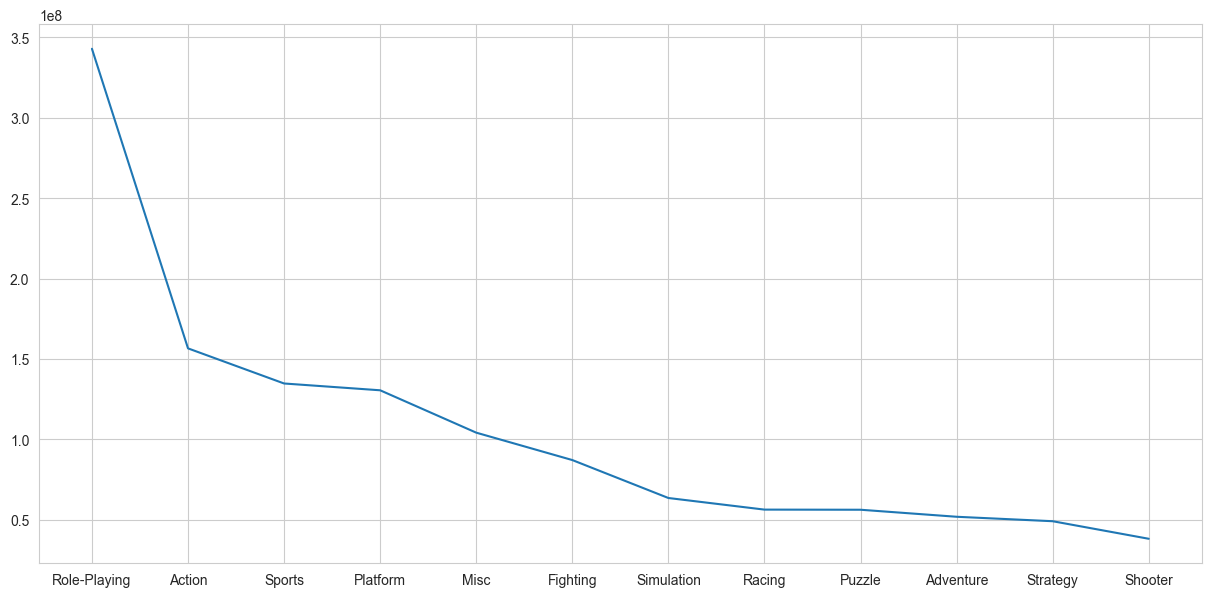

In [51]:
plt.figure(figsize = (15, 7))
plt.plot(df_genre_jp)
plt.show()

In [36]:
df_genre_ot

Genre
Action          183990000.0
Sports          132350000.0
Shooter         101860000.0
Racing           76510000.0
Misc             72640000.0
Role-Playing     56730000.0
Platform         51450000.0
Fighting         36150000.0
Simulation       31320000.0
Adventure        16700000.0
Puzzle           12440000.0
Strategy         11230000.0
Name: Other_Sales, dtype: float64

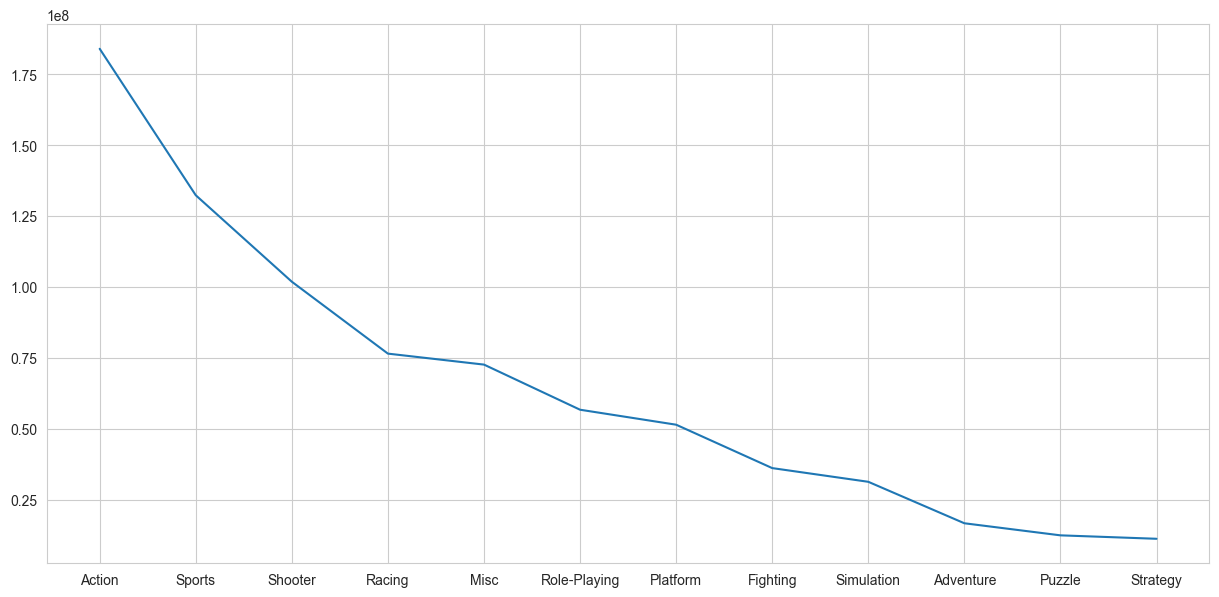

In [52]:
plt.figure(figsize = (15, 7))
plt.plot(df_genre_ot)
plt.show()

In [37]:
df_genre_na

Genre
Action          858750000.0
Sports          667260000.0
Shooter         574480000.0
Platform        445380000.0
Misc            394730000.0
Racing          354700000.0
Role-Playing    318760000.0
Fighting        220350000.0
Simulation      181430000.0
Puzzle          121580000.0
Adventure       101790000.0
Strategy         67830000.0
Name: NA_Sales, dtype: float64

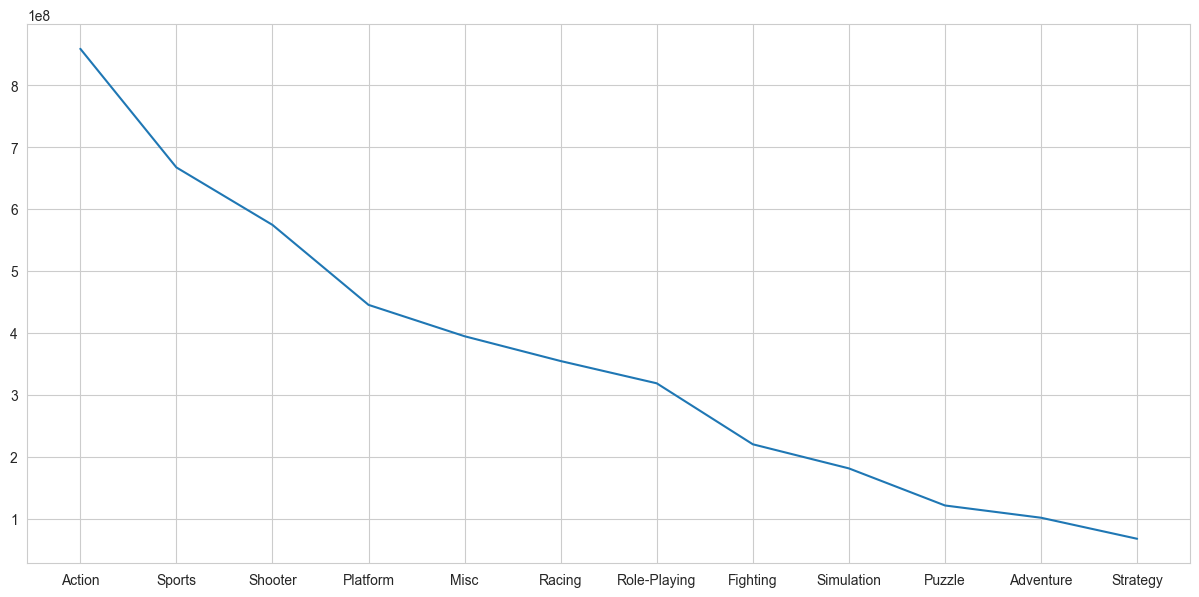

In [55]:
plt.figure(figsize = (15, 7))
plt.plot(df_genre_na)
plt.show()

# 🎮연도별 게임트렌드

##### - 연도별로 가장 매출이 높았던 장르를 추출하여 시각화

In [56]:
df_year_trend = df.groupby(['Year', 'Genre'])['All_Sales'].sum().reset_index()  # 'Year', 'Genre' 컬럼을 기준으로 합계를 구함
df_year_trend

,Year,Genre,All_Sales
0,1980,Action,340000.0
1,1980,Fighting,770000.0
2,1980,Misc,2700000.0
3,1980,Shooter,7070000.0
4,1981,Action,14790000.0
...,...,...,...
383,2016,Sports,14630000.0
384,2016,Strategy,520000.0
385,2017,Action,10000.0
386,2017,Role-Playing,40000.0


In [68]:
df_year = df_year_trend.groupby('Year')['All_Sales'].transform(max) == df_year_trend['All_Sales']  # 연도별 가장 많은 매출을 가진 값을 대체하는 작업
df_year_max = df_year_trend[df_year].reset_index(drop = True)   # df_year_max 에 연도별 가장 많은 매출을 가진 값을 저장
df_year_max = df_year_max.rename(columns = {'All_Sales': 'Max_Sales'}) # 컬럼명 바꾸기
df_year_max

,Year,Genre,Max_Sales
0,1980,Shooter,7070000.0
1,1981,Action,14790000.0
2,1982,Puzzle,10040000.0
3,1983,Platform,6930000.0
4,1984,Shooter,31100000.0
5,1985,Platform,43170000.0
6,1986,Action,13740000.0
7,1987,Fighting,5420000.0
8,1988,Platform,27730000.0
9,1989,Puzzle,37750000.0


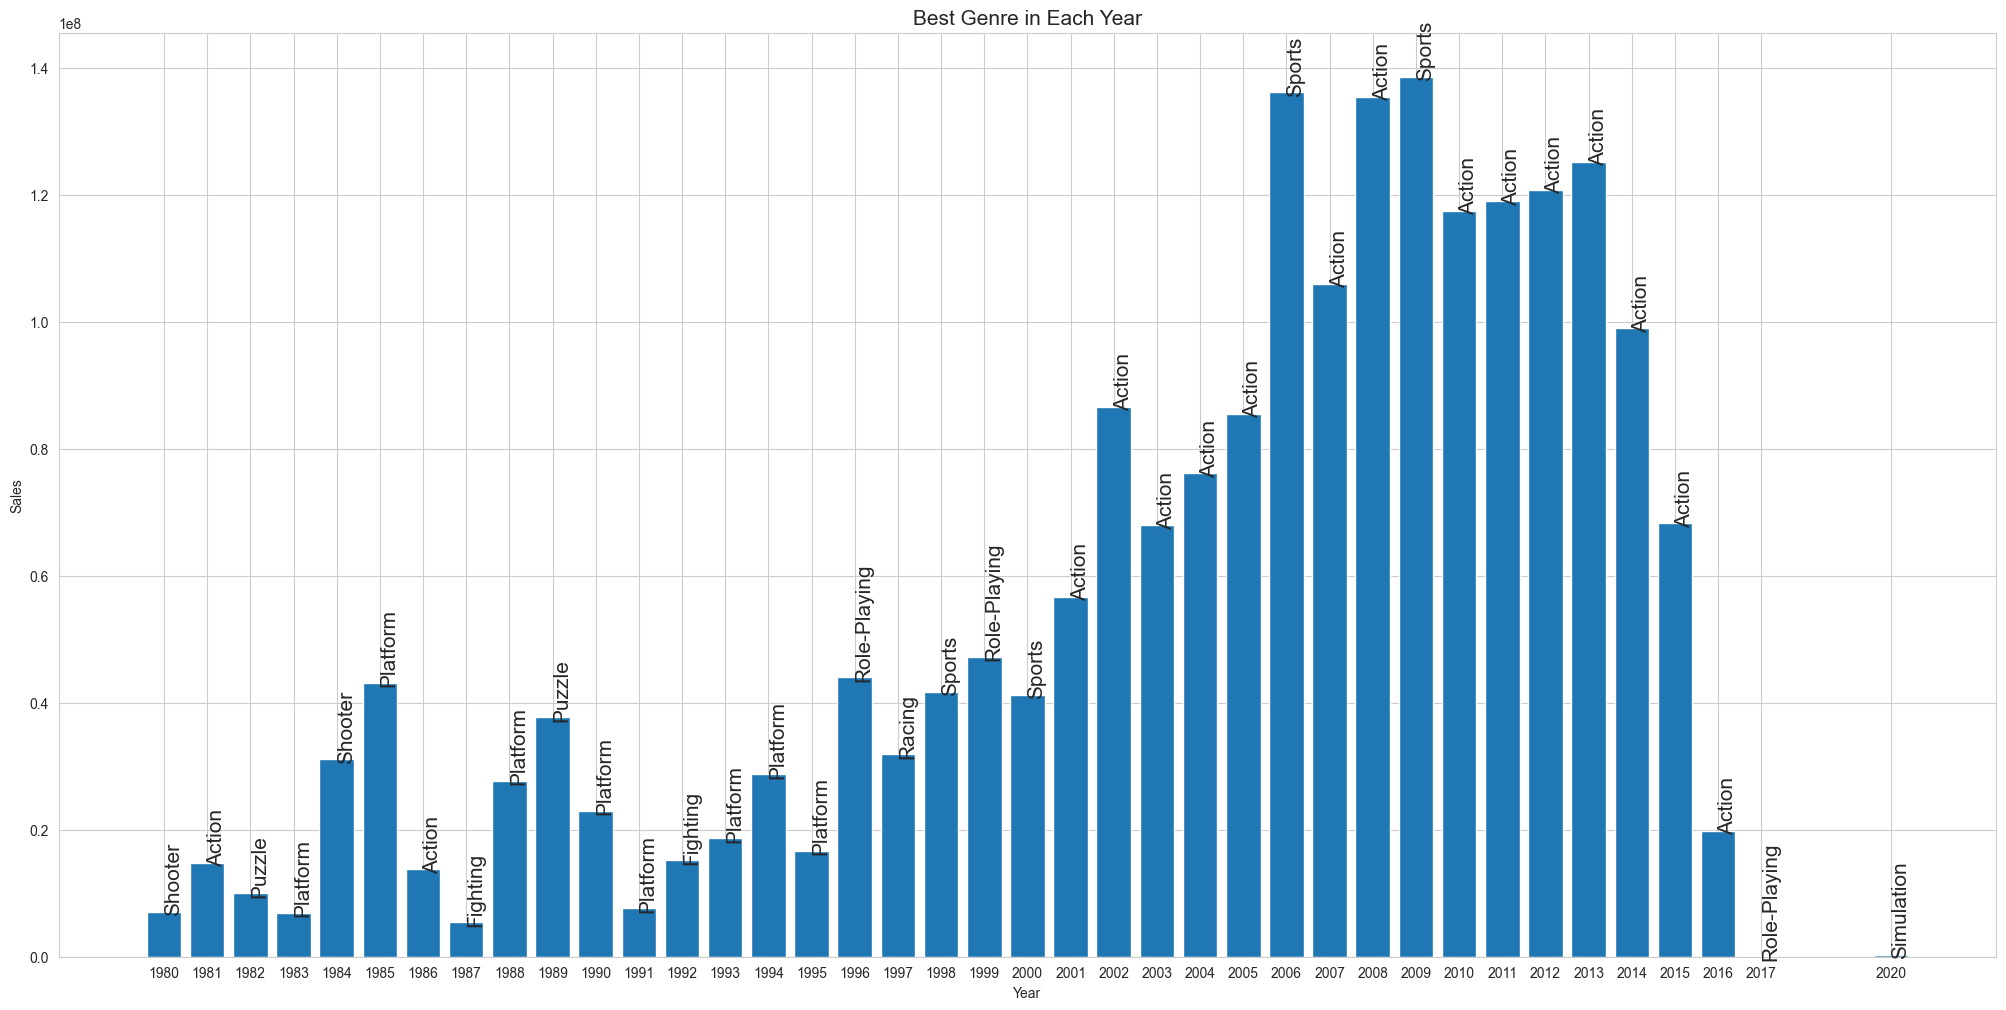

In [69]:
plt.figure(figsize=(25, 12))
plt.bar(df_year_max['Year'], df_year_max['Max_Sales'])
plt.title("Best Genre in Each Year", fontsize = 15)
plt.xlabel('Year')
plt.ylabel('Sales')
plt.xticks(df_year_max['Year'])

df_x = df_year_max['Year']
df_y = df_year_max['Max_Sales']

for i, v in enumerate(df_x):
    plt.text(v, df_y[i], df_year_max['Genre'][i], fontsize = 15, rotation = 90)
plt.show()

##### - 데이터상에서 2001년 기준으로 엄청난 상승세를 보이고있다. (2000년대에 들어서면서 개인용 컴퓨터의 상용화로 인해 게임을 많이 접할 수 있었던 것으로 분석 가능하다.)
##### - 2001년 전에는 'Platform' 장르의 게임이 유행했다. (슈퍼마리오, 페르시아의 왕자 등등.. (아케이드 비디오 게임))
##### - 2001년도 부터 'Action' 장르의 매출량이 상당히 높다.
##### - 2006년, 2009년은 유난히 'Sports' 장르의 매출이 높은데 예상으로는 2006년 독일 월드컵과, 2009년 FIFA U-20(이집트) 와 U-17(나이지리아) 월드컵의 영향이 커 보인다. 2009년에 챔피언스리그..
  - 2006년 FIFA 월드컵은 TV 시청자가 가장 많은 대회 중 하나로 손꼽히며, 대회 전체 기간을 도합해 262억 9천만명의 누적 시청자들이 시청한 것으로 추정된다. 결승전은 약 7억 1510만명의 누적 시청자가 집계된 것으로 추산된다. 2006년 FIFA 월드컵의 누적 시청자 수는 1994년, 2002년, 그리고 1990년 대회에 이어 4위로 추산된다. <출처 : 위키백과>

  - 1900년대와 2000년대 초에도 월드컵을 하였지만 게임 매출이 적은 이유를 대략적으로 정리해보자면 1900년대 중반기 부터 처음 스포츠 게임이 나왔으며, 1900년대 후반기에 점차 다양하게 형성됐고, 2000년대 개인컴퓨터의 상용화를 기점으로 다양하고 완성도있는 게임의 출시로 인하여 확실한 차별점이 보이는 부분이다.

##### - 액션 게임의 대중화는 아마 2000년대 이전에 장르의 확실성 때문으로 판단.
  - 현대의 시판되는 모든 게임들 중 순수 액션 게임이라고 할 만한 것은 없지만, '액션' 이라는 광범위한 장르가 모든 게임에 녹아 있어서 정확히 세분화 되어있지 않은 데이터에서는 거의 모든 게임들이 기본적으로 액션을 포함하고 있기에 이런 그래프를 보이는 듯 하다. 
  - *기본적으로는 버튼을 조작하여 캐릭터를 움직이는 게임 전반을 가리키므로 매우 폭넓은 장르를 포함하는 분류다.  <출처 : 나무위키>

In [70]:
df['All_Sales'] = df['All_Sales'].astype(int)
df['NA_Sales'] = df['NA_Sales'].astype(int)
df['EU_Sales'] = df['EU_Sales'].astype(int)
df['JP_Sales'] = df['JP_Sales'].astype(int)
df['Other_Sales'] = df['Other_Sales'].astype(int)
df

# 자료형 int로 변환 (보기 편하게)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000
...,...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000,200000
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0,10000
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000,790000
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000,380000


# 🎮출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [72]:
df_game_rank = df.groupby(['Name', 'Genre', 'Publisher'])['All_Sales'].sum().reset_index()
df_game_rank

,Name,Genre,Publisher,All_Sales
0,'98 Koshien,Sports,Magical Company,400000
1,.hack//G.U. Vol.1//Rebirth,Role-Playing,Namco Bandai Games,170000
2,.hack//G.U. Vol.2//Reminisce,Role-Playing,Namco Bandai Games,230000
3,.hack//G.U. Vol.2//Reminisce (jp sales),Role-Playing,Namco Bandai Games,160000
4,.hack//G.U. Vol.3//Redemption,Role-Playing,Namco Bandai Games,170000
...,...,...,...,...
11662,thinkSMART FAMILY!,Misc,Conspiracy Entertainment,30000
11663,thinkSMART: Chess for Kids,Misc,Mentor Interactive,10000
11664,uDraw Studio,Misc,THQ,2450000
11665,uDraw Studio: Instant Artist,Misc,THQ,210000


In [73]:
df_game_rank = df_game_rank.sort_values(by = 'All_Sales', ascending = False)
df_30 = df_game_rank.head(30)
df_30

,Name,Genre,Publisher,All_Sales
11179,Wii Sports,Sports,Nintendo,82740000
3766,Grand Theft Auto V,Action,Take-Two Interactive,55920000
9487,Super Mario Bros.,Platform,Nintendo,45310000
9882,Tetris,Puzzle,Nintendo,35840000
5653,Mario Kart Wii,Racing,Nintendo,35830000
11181,Wii Sports Resort,Sports,Nintendo,33000000
7459,Pokemon Red/Pokemon Blue,Role-Playing,Nintendo,31380000
1260,Call of Duty: Modern Warfare 3,Shooter,Activision,30840000
6823,New Super Mario Bros.,Platform,Nintendo,30010000
1256,Call of Duty: Black Ops II,Shooter,Activision,29730000


c:\Users\nsa28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


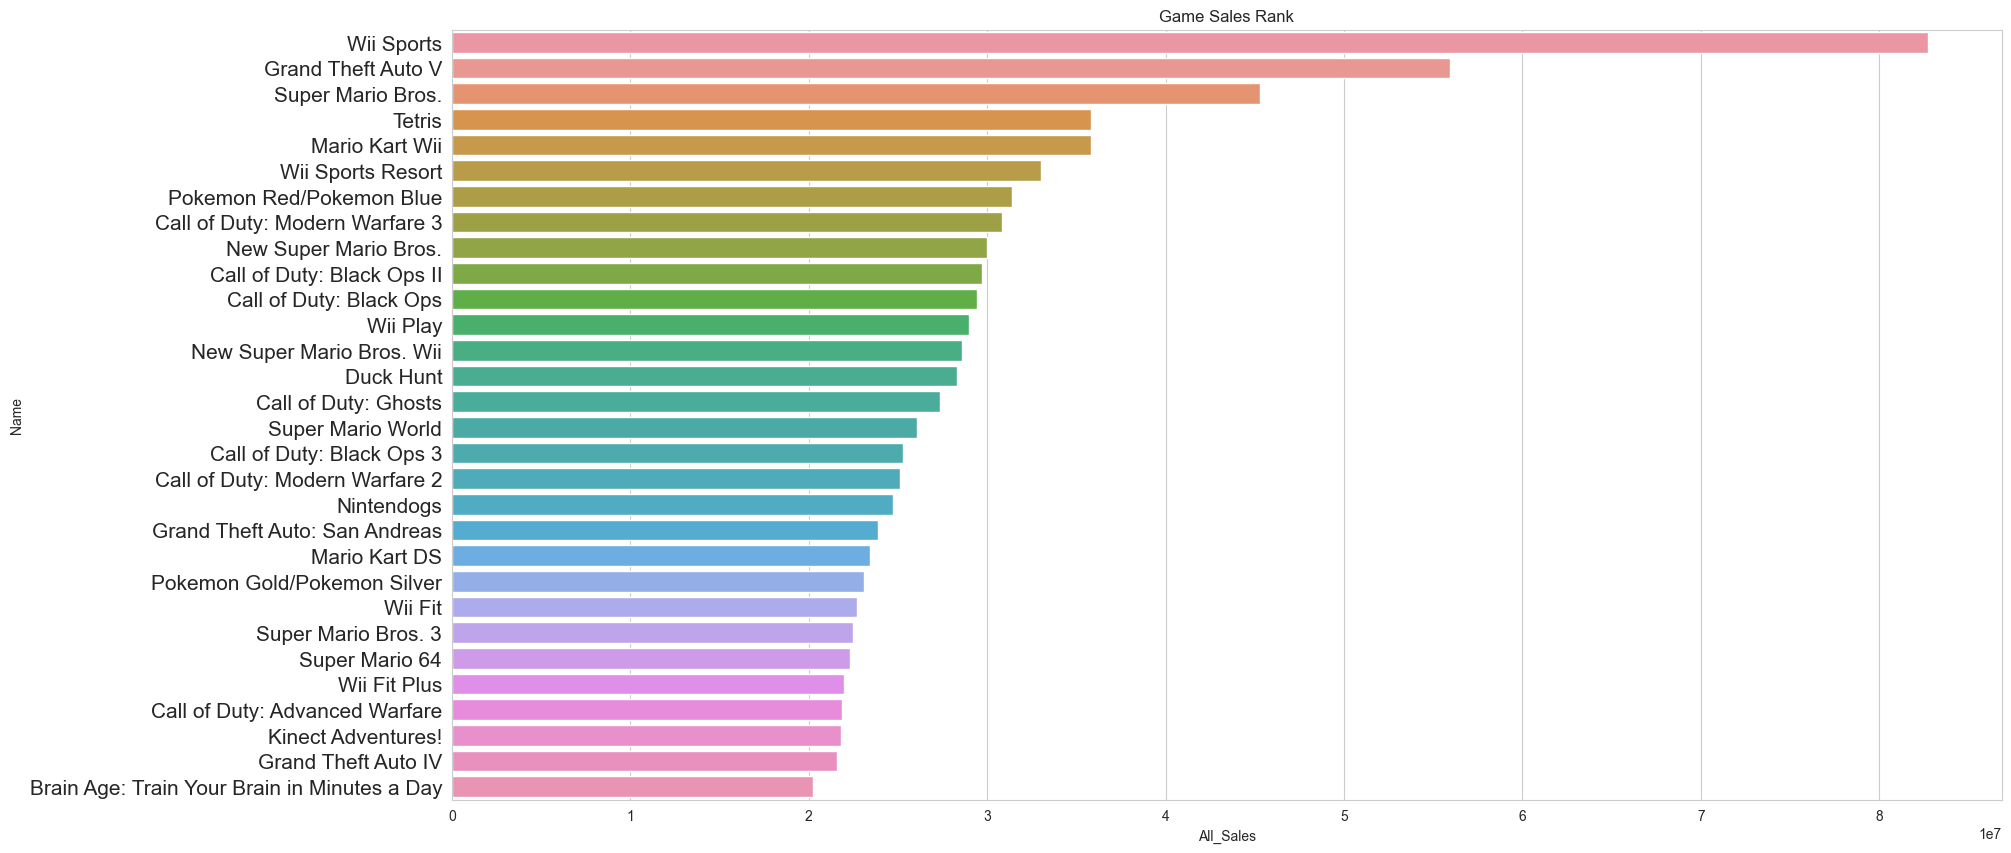

In [74]:
plt.figure(figsize = (20, 10))
plt.title('Game Sales Rank')
sns.barplot(df_30['All_Sales'], df_30['Name'])
plt.yticks(rotation = 0, fontsize = 15)
plt.show()

#### - Nintendo 에서 publishing 한 게임들이 1위 ~ 30위 까지 대부분 점령 하고있다.
    
*  위의 그래프에서 봤지만 액션 장르가 2000년대 트렌드 였지만 매출 순위로 보았을 때는 30위 까지의 순위중 액션 장르의 분포는 중반부 부터 본격적으로 시작되는듯 하다.

### ⚽️ 매출 1위에 빛나는 'Nintendo' 사의 'Wii Sports' 에 대해서 분석해보고 시각화 해보자.

In [75]:
game_top1 = df[df['Name'] == 'Wii Sports']
game_top1 = game_top1.drop(['Platform', 'Year', 'Genre', 'Publisher', 'All_Sales'], axis = 1)
game_top1

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2908,Wii Sports,41490000,29020000,3770000,8460000


c:\Users\nsa28\anaconda3\lib\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: title={'center': 'Wii Sports Sales'}>

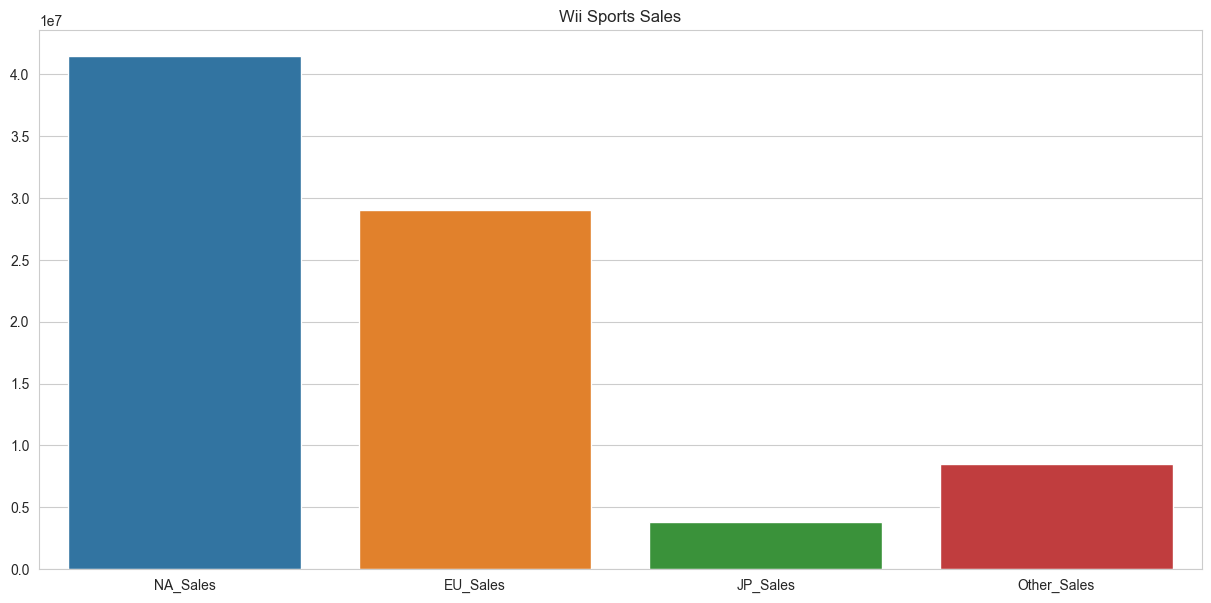

In [76]:
sns.set_style('whitegrid')
plt.figure(figsize = (15, 7))
plt.title('Wii Sports Sales')
sns.barplot(data = game_top1)

* NA 지역에서의 판매량이 가장 높다.

## 🎮플랫폼 별 총 판매량

In [77]:
df_platform = df.groupby('Platform')['All_Sales'].sum().reset_index()
df_platform = df_platform.sort_values(by = 'All_Sales', ascending = False)
df_platform

,Platform,All_Sales
16,PS2,1222440000
28,X360,968590000
17,PS3,946740000
26,Wii,900150000
4,DS,817190000
15,PS,725160000
6,GBA,304760000
19,PSP,290840000
18,PS4,275780000
5,GB,254430000


c:\Users\nsa28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: title={'center': 'Game Sales by Platform'}, xlabel='All_Sales', ylabel='Platform'>

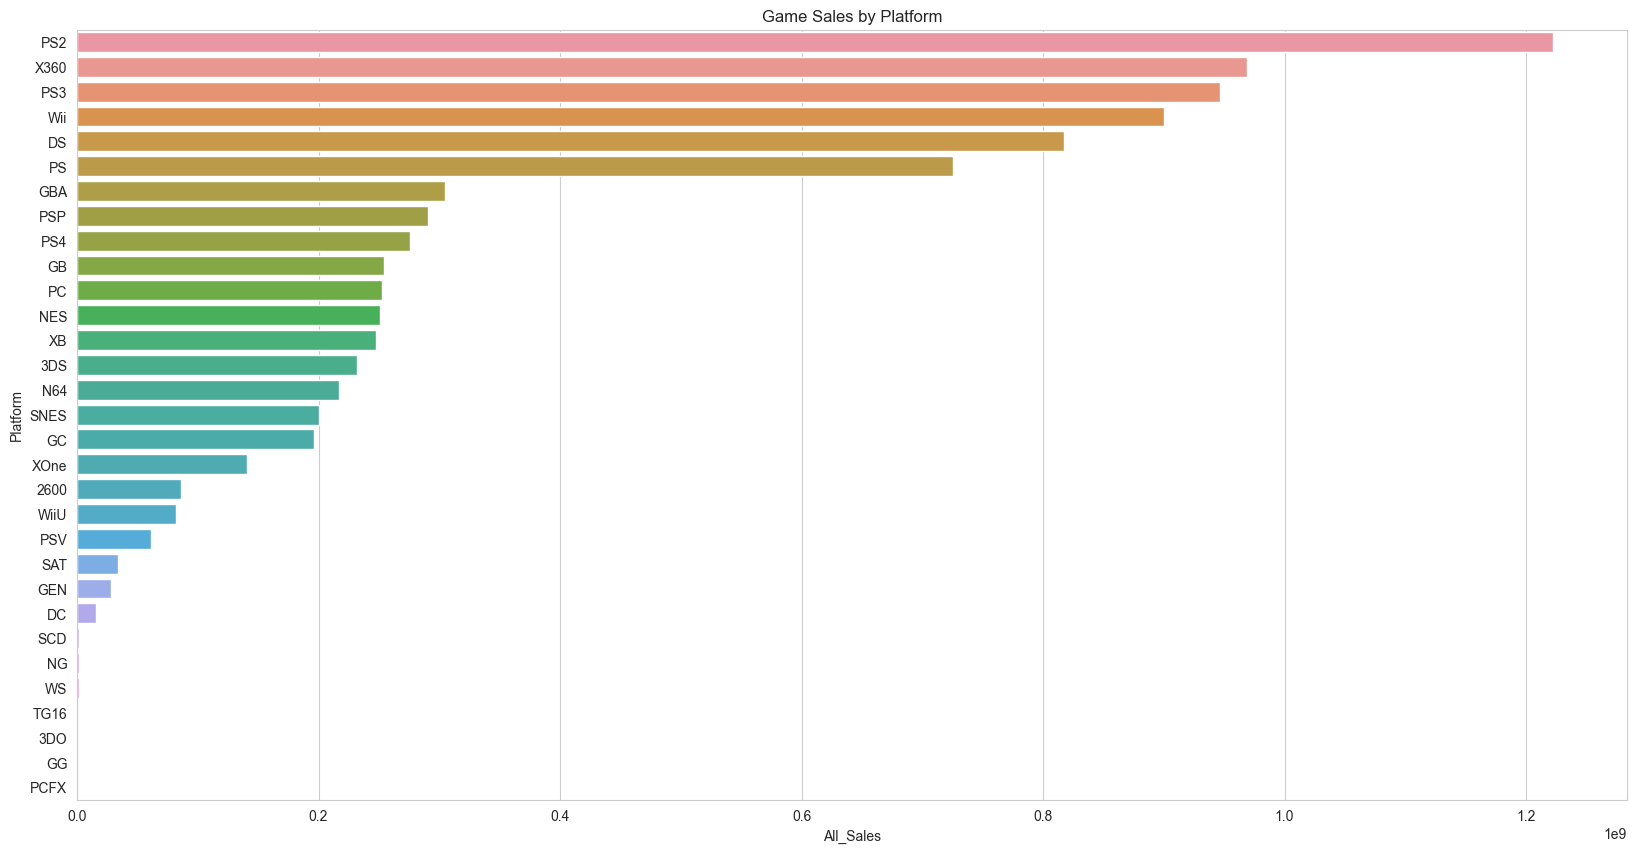

In [78]:
sns.set_style('whitegrid')
plt.figure(figsize = (20, 10))
plt.title('Game Sales by Platform')
sns.barplot(df_platform['All_Sales'], df_platform['Platform'])

In [79]:
df_gta = df[df['Name'] == 'Grand Theft Auto V']
df_gta

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
2008,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3800000,5810000,360000,2020000,11990000
3483,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7010000,9270000,970000,4139999,21390000
10834,Grand Theft Auto V,XOne,2014,Action,Take-Two Interactive,2660000,2009999,0,410000,5080000
10913,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9630000,5310000,60000,1380000,16380000
16575,Grand Theft Auto V,PC,2015,Action,Take-Two Interactive,360000,640000,0,80000,1080000


c:\Users\nsa28\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot: title={'center': 'Grand Theft Auto V Sales by Platform'}, xlabel='Platform', ylabel='All_Sales'>

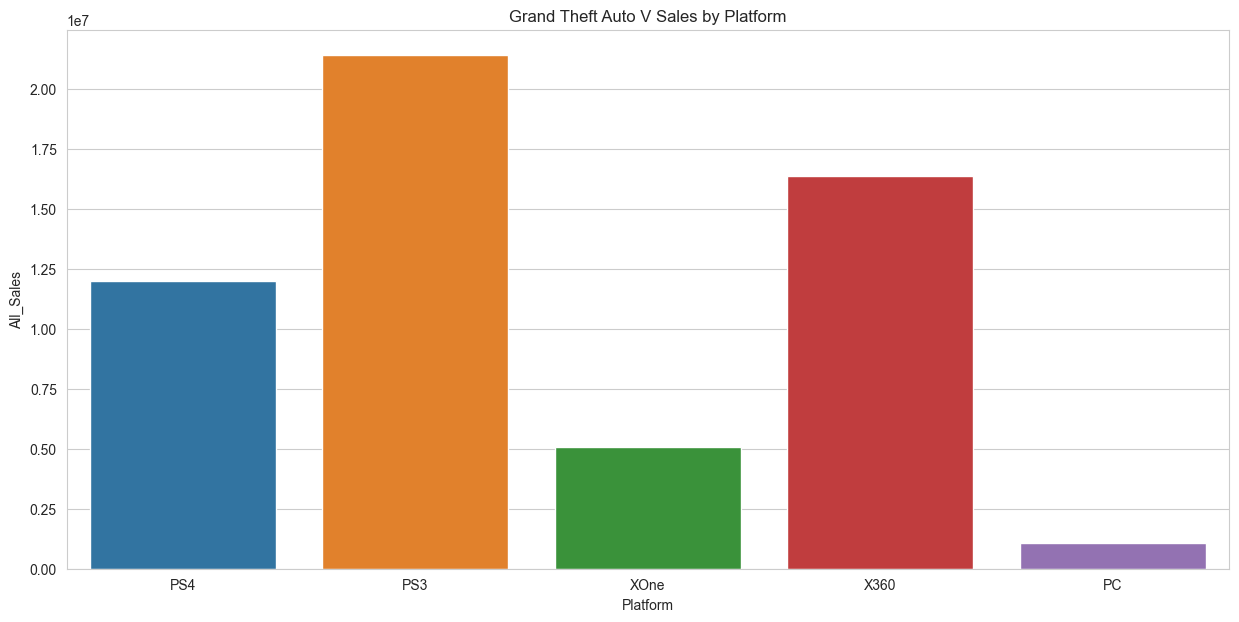

In [80]:
sns.set_style('whitegrid')
plt.figure(figsize = (15, 7))
plt.title('Grand Theft Auto V Sales by Platform')
sns.barplot(df_gta['Platform'], df_gta['All_Sales'])

- 플랫폼 별 총 판매량 확인결과 콘솔게임의 매출이 압도적으로 높다.
- 대표적으로 'Grand Theft Auto V' 게임을 추출해서 확인해본 결과 이 게임 역시 콘솔게임의 매출이 압도적이다.
    - 주력으로 판매해야할 장르는 액션, 플랫폼은 콘솔 뿐 아니라 PC게임도 같이 퍼블리싱을 하는 것이 매출에 도움이 될 것으로 판단. (크로스 플랫폼)